### **PRIMER PARCIAL 02/2023**

A partir de la lista de datasets conformada, *construir un modelo de regresion aplicando el descenso por el gradiente y la ecuacion de la normal para el dataset* que se encuentra una fila por debajo de su nombre en la lista anteriormente mencionada.

Se debe incluir el codigo fuente ademas de una explicacion breve del dataset que se le asigno, si existirian problemas estos deben ser descritos en que consisten y cual el enfoque utilizado para abordarlos.
```
# Tacuri Rengifo Victor Manuel
# Ingenieria de Sistemas
# CU: 35-5210
```

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Acceder a Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Carga de dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Most Streamed Spotify Songs 2023/spotify-2023.csv', encoding = "ISO-8859-1")#,skiprows=0, header=None)

In [5]:
print(data)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
#En caso de haber algun dato fila cualitativa convertimos a cuantitativo
columnas_categoricas = data.select_dtypes(include=['object']).columns
#columnas_categoricas = data.select_dtypes(include=['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'in_shazam_charts', 'key','mode' ]).columns

In [8]:
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   track_name            953 non-null    int64
 1   artist(s)_name        953 non-null    int64
 2   artist_count          953 non-null    int64
 3   released_year         953 non-null    int64
 4   released_month        953 non-null    int64
 5   released_day          953 non-null    int64
 6   in_spotify_playlists  953 non-null    int64
 7   in_spotify_charts     953 non-null    int64
 8   streams               953 non-null    int64
 9   in_apple_playlists    953 non-null    int64
 10  in_apple_charts       953 non-null    int64
 11  in_deezer_playlists   953 non-null    int64
 12  in_deezer_charts      953 non-null    int64
 13  in_shazam_charts      953 non-null    int64
 14  bpm                   953 non-null    int64
 15  key                   953 non-null    int64
 16  mode    

In [10]:
print(data)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0           687             326             2           2023               7   
1           397             401             1           2023               3   
2           936             431             1           2023               6   
3           170             558             1           2019               8   
4           864              43             1           2023               5   
..          ...             ...           ...            ...             ...   
948         523             517             1           2022              11   
949          95             558             1           2022              10   
950          14             184             2           2022              11   
951         237             185             3           2022              10   
952          44              78             1           2022              11   

     released_day  in_spotify_playlists

In [11]:
# Obtener la columna que deseas mover
columna_a_mover = data.pop('streams')

# Agregar la columna al final del DataFrame
data['streams'] = columna_a_mover

# Generar un nuevo dataset con la columna movida
nuevo_dataset = data.copy()

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_dataset.to_csv('dataconyalfinal.csv', index=False)

print("Archivo 'vinos2.csv' creado exitosamente.")

Archivo 'vinos2.csv' creado exitosamente.


In [12]:
#Carga de dataset

data = pd.read_csv('/content/dataconyalfinal.csv', encoding = "ISO-8859-1")#,skiprows=0, header=None)

In [13]:
print(data)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0           687             326             2           2023               7   
1           397             401             1           2023               3   
2           936             431             1           2023               6   
3           170             558             1           2019               8   
4           864              43             1           2023               5   
..          ...             ...           ...            ...             ...   
948         523             517             1           2022              11   
949          95             558             1           2022              10   
950          14             184             2           2022              11   
951         237             185             3           2022              10   
952          44              78             1           2022              11   

     released_day  in_spotify_playlists

In [18]:
# Lectura de Datos
X = data.iloc[:, :23]
y = data.iloc[:, 23]
m = y.size

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   track_name            953 non-null    int64
 1   artist(s)_name        953 non-null    int64
 2   artist_count          953 non-null    int64
 3   released_year         953 non-null    int64
 4   released_month        953 non-null    int64
 5   released_day          953 non-null    int64
 6   in_spotify_playlists  953 non-null    int64
 7   in_spotify_charts     953 non-null    int64
 8   in_apple_playlists    953 non-null    int64
 9   in_apple_charts       953 non-null    int64
 10  in_deezer_playlists   953 non-null    int64
 11  in_deezer_charts      953 non-null    int64
 12  in_shazam_charts      953 non-null    int64
 13  bpm                   953 non-null    int64
 14  key                   953 non-null    int64
 15  mode                  953 non-null    int64
 16  danceabi

In [16]:
print(X)
print('*'*60)
print(y)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0           687             326             2           2023               7   
1           397             401             1           2023               3   
2           936             431             1           2023               6   
3           170             558             1           2019               8   
4           864              43             1           2023               5   
..          ...             ...           ...            ...             ...   
948         523             517             1           2022              11   
949          95             558             1           2022              10   
950          14             184             2           2022              11   
951         237             185             3           2022              10   
952          44              78             1           2022              11   

     released_day  in_spotify_playlists

# Normalizar
para que los valores esten de escala similar
x0 y x1 esten entree 0.5

In [19]:
def  featureNormalize(X):
  # xnorm es una variable se va a copiar de (x) para no alterar el valor de x
    X_norm = X.copy()
    #se crea dos arrgelos de la misma dimension
    mu = np.zeros(X.shape[1])# promedio y crea un arreglo igual a 0zeros
    sigma = np.zeros(X.shape[1])# se crea esto mas

    mu = np.mean(X, axis = 0) #media de X en el eje 0
    sigma = np.std(X, axis = 0) # desviacion estandar de X en el eje 0
    X_norm = (X - mu) / sigma # aqui esta aplicando la formula Y LO AGREA A XNORM

    return X_norm, mu, sigma

In [20]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0           687             326             2           2023               7   
1           397             401             1           2023               3   
2           936             431             1           2023               6   
3           170             558             1           2019               8   
4           864              43             1           2023               5   
..          ...             ...           ...            ...             ...   
948         523             517             1           2022              11   
949          95             558             1           2022              10   
950          14             184             2           2022              11   
951         237             185             3           2022              10   
952          44              78             1           2022              11   

     released_day  in_spotify_playlists

# Implementacion

In [21]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
# Para aplicar la funcion desenso por el gradientey la funsion de costo agregamos una columna X0 con todo 1nos
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [22]:
print(X)

[[ 1.          0.7961599   0.0192232  ... -0.188132   -0.74525619
  -0.61882917]
 [ 1.         -0.2704682   0.41875172 ... -0.188132   -0.5993137
  -0.61882917]
 [ 1.          1.71198885  0.57856313 ... -0.188132    0.9330825
  -0.41696568]
 ...
 [ 1.         -1.6791529  -0.73721745 ... -0.188132   -0.74525619
  -0.41696568]
 [ 1.         -0.85895267 -0.7318904  ... -0.188132   -0.4533712
  -0.51789743]
 [ 1.         -1.56881206 -1.30188442 ... -0.188132   -0.52634245
  -0.51789743]]


# Calculo de Costo

In [23]:
def computeCostMulti(X, y, theta):

    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)
#Funsion de costo
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [24]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
#NOS PERMITR AJUSTAR LOS VALORES DE THETHA BUSCANDO EL VALOR DE COSTO MAS PQUEÑITO
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy() # aqui copiamos thetha para que no afecte los valores

    J_history = [] #lista que se utiliza para almacenar el costo en cada iteracion
# BUCLE QUE CALCULA PARA TODAS LAS THETAS
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [25]:
fila_deseada = 0

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[ 687  326    2 2023    7   14  553  147   43  263  217   10  185  125
    2    0   80   89   83   31    0    8    4  156]


theta calculado por el descenso por el gradiente: [ 4.70627627e+02  1.36496571e+00  9.79325705e+00 -1.02931967e+01
 -1.39157485e+01  4.40195664e+00  3.49761517e+00 -3.69515932e+01
 -1.14370663e+01 -7.46750326e+00  2.62979298e+01 -3.82250420e+00
  2.62493473e+00 -6.41351176e+00 -1.80874234e-01 -1.49605881e+01
  1.66667212e+01 -6.76618262e+00 -5.26541279e+00  8.69781973e-01
 -7.12356591e+00  4.13641248e+00  5.62613531e-01 -6.56598754e+00]
El valor  esperados :predecido es (usando el descenso por el gradiente): 399.4600


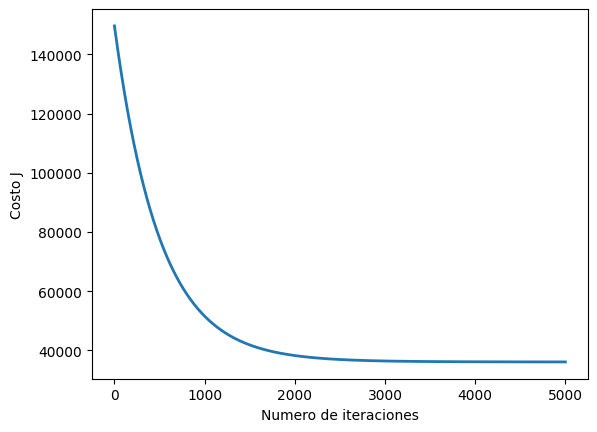

In [39]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # coeficiente aprendizaje
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
#AQUI CREAMOS UN ARREGLO DE ZEROS
theta = np.zeros(24)  #cambiar esto
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 687,  326, 2, 2023, 7, 14, 553, 147, 43, 263, 217, 10, 185, 125, 2, 0, 80, 89, 83, 31, 8, 4, 156]#cambiar esto
X_array[1:24] = (X_array[1:24] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor  esperados :predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [32]:
X_array = [687,  326, 2, 2023, 7, 14, 553, 147, 43, 263, 217, 10, 185, 125, 2, 0, 80, 89, 83, 31, 0, 8, 4, 156]
X_array[1:24] = (X_array[1:24] - mu) / sigma

In [33]:
X_array[1:24]

[-0.5316081860498749,
 -1.7067399813675952,
 2264.731445248767,
 -181.02327849600232,
 2.2348940821021257,
 58.61283164173185,
 -0.6401656666667557,
 1.58392121306044,
 2.2592196061769414,
 3.262437093804167,
 -1.542497936803807,
 30.2255705196953,
 0.9142644771996923,
 -4.298401324215186,
 -1.6253468101494872,
 161.08209777696402,
 1.5065672570543762,
 1.3451642359713782,
 -2.011814763979061,
 -1.0413847988438365,
 0.7636386340929889,
 -1.037141182898792,
 14.722796492566196]

# ECUACION DE LA Normalizacion
THETHA = XTRANSPUESTA POR X

In [34]:
#ES MAS EFECTIVA QUE EL DESENSO POR EL GRADIENTE EN PRESISCION PERO LA LIMITACION CUANDO SON MUY POCOS DATOS NO PUEDE DAR NO HAY QUE NORMALIZAR DATOS
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [46]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 687,  326, 2, 2023, 7, 14, 553, 147, 43, 263, 217, 10, 185, 125, 2, 0, 80, 89, 83, 31, 8, 4, 156]
price = np.dot(X_array, theta)

print('Canciones de Spotify más reproducidas en 2023: {:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 4.73812172e+02  1.87190448e+00  9.92381423e+00 -1.04409404e+01
 -1.64344028e+01  3.57320380e+00  3.50320351e+00 -4.33941670e+01
 -1.41337123e+01 -2.86521670e+00  2.86102089e+01 -3.66692758e+00
  3.56786032e+00 -7.02289768e+00 -6.13001868e-01 -1.50530385e+01
  1.69368836e+01 -6.93143695e+00 -6.16893191e+00  7.14294930e-01
 -8.06007366e+00  4.01870439e+00  2.21156547e-01 -5.87805133e+00]
Canciones de Spotify más reproducidas en 2023: -51216
